## Importing libraries and Merging datas.

In [1]:
# Importing relevant libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

# Ensuring that the entire columns of the dataframes are displayed.
pd.set_option('display.max_columns', None)

In [2]:
# Reading the datasets.

demographics = pd.read_csv("traindemographics.csv")
previous = pd.read_csv("trainprevloans.csv")
performance = pd.read_csv("trainperf.csv")

In [3]:
demographics.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN


In [4]:
demographics.shape

(4346, 9)

In [5]:
demographics[demographics['customerid'] == '8a2a81a74ce8c05d014cfb32a0da1049']

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
1028,8a2a81a74ce8c05d014cfb32a0da1049,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate


In [6]:
previous.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000


In [7]:
previous.shape

(18183, 12)

In [8]:
previous[previous['customerid'] == '8a2a81a74ce8c05d014cfb32a0da1049']

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
55,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,2017-06-25 15:24:06.000000,NaN,2017-07-03 00:00:00.000000,2017-06-25 15:13:56.000000
56,8a2a81a74ce8c05d014cfb32a0da1049,301954468,11,2017-06-28 10:58:34.000000,2017-06-28 09:58:25.000000,20000.0,24500.0,30,2017-07-25 08:14:36.000000,NaN,2017-07-31 00:00:00.000000,2017-07-25 08:04:27.000000
57,8a2a81a74ce8c05d014cfb32a0da1049,301777989,6,2016-12-21 19:03:40.000000,2016-12-21 11:02:54.000000,20000.0,23800.0,30,2017-02-28 13:20:29.000000,NaN,2017-01-20 00:00:00.000000,2017-02-28 13:05:11.000000
1141,8a2a81a74ce8c05d014cfb32a0da1049,301739329,4,2016-10-07 19:00:48.000000,2016-10-07 18:00:37.000000,20000.0,24500.0,30,2016-11-07 08:29:43.000000,NaN,2016-11-07 00:00:00.000000,2016-11-07 08:14:34.000000
1142,8a2a81a74ce8c05d014cfb32a0da1049,301828139,7,2017-02-28 13:25:25.000000,2017-02-28 12:25:18.000000,20000.0,23800.0,30,2017-03-01 18:25:25.000000,NaN,2017-03-30 00:00:00.000000,2017-03-01 18:10:14.000000
1742,8a2a81a74ce8c05d014cfb32a0da1049,301675247,1,2016-08-09 22:57:01.000000,2016-08-09 21:56:47.000000,10000.0,13000.0,30,2016-08-15 08:49:18.000000,NaN,2016-09-08 00:00:00.000000,2016-08-15 08:34:14.000000
1743,8a2a81a74ce8c05d014cfb32a0da1049,301705521,3,2016-09-05 08:45:24.000000,2016-09-05 07:45:16.000000,20000.0,24500.0,30,2016-10-04 18:02:58.000000,NaN,2016-10-05 00:00:00.000000,2016-10-04 17:47:49.000000


In [9]:
performance.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good


In [10]:
performance.shape

(4368, 10)

In [11]:
performance[performance['customerid'] == '8a2a81a74ce8c05d014cfb32a0da1049']

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good


In [12]:
# Merging the first two datasets using customerid as primary key.

dataset1 = pd.merge(demographics, previous, on="customerid")

In [13]:
dataset1.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301943951,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,8a858899538ddb8e0153a780c56e34bb,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301929966,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,NaN,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301931228,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,NaN,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000


In [14]:
dataset1.shape

(13693, 20)

In [15]:
# Merging the third dataset with the already merged two (dataset1).

dataset = pd.merge(dataset1, performance, on='customerid')

In [16]:
dataset.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,referredby_x,firstduedate,firstrepaiddate,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,referredby_y,good_bad_flag
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301943951,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,8a858899538ddb8e0153a780c56e34bb,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000,301964962,2,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301929966,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,NaN,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000,301972172,2,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30,NaN,Bad
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301931228,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,NaN,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good


In [17]:
dataset.shape

(13693, 29)

## Data Inspection and Cleaning.

In [18]:
# Information about the data.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13693 non-null  object 
 1   birthdate                   13693 non-null  object 
 2   bank_account_type           13693 non-null  object 
 3   longitude_gps               13693 non-null  float64
 4   latitude_gps                13693 non-null  float64
 5   bank_name_clients           13693 non-null  object 
 6   bank_branch_clients         104 non-null    object 
 7   employment_status_clients   12330 non-null  object 
 8   level_of_education_clients  3464 non-null   object 
 9   systemloanid_x              13693 non-null  int64  
 10  loannumber_x                13693 non-null  int64  
 11  approveddate_x              13693 non-null  object 
 12  creationdate_x              13693 non-null  object 
 13  loanamount_x                136

In [19]:
# Number of unique customers.

len(dataset['customerid'].unique())

3264

In [20]:
dataset.describe()

,longitude_gps,latitude_gps,systemloanid_x,loannumber_x,loanamount_x,totaldue_x,termdays_x,systemloanid_y,loannumber_y,loanamount_y,totaldue_y,termdays_y
count,13693.000000,13693.000000,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000
mean,4.482207,7.291442,3.018395e+08,4.200760,16566.347769,19646.612269,26.742131,3.019801e+08,8.401081,25688.673045,29812.666494,33.233769
std,8.639590,3.436232,9.304690e+04,3.269552,9375.687619,10512.238823,10.997624,1.343531e+04,4.318780,12625.374212,13772.770273,14.440482
min,-118.247009,-33.868818,3.016001e+08,1.000000,3000.000000,3900.000000,15.000000,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.354793,6.471885,3.017767e+08,2.000000,10000.000000,11500.000000,15.000000,3.019678e+08,5.000000,10000.000000,13000.000000,30.000000
50%,3.576022,6.617633,3.018545e+08,3.000000,10000.000000,13000.000000,30.000000,3.019787e+08,8.000000,30000.000000,33000.000000,30.000000
75%,6.364658,7.421333,3.019193e+08,6.000000,20000.000000,24500.000000,30.000000,3.019929e+08,11.000000,40000.000000,44000.000000,30.000000
max,151.209290,71.228069,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


We observed that there are two columns for loannumber, loanamount, termdays etc. that are having different values. This is cos we merged the current loan application data with the previous loan application data which has details of those variables. 

To avoid confusion on which loannumber, loanamount, and termdays to use, we'll drop the previous loan dataset.

For now, we do not need the previous loan dataset cos the loannumber in the performance dataset already gives a little detail about it. So, We'd merge the demographics and performance datasets as 'main', and then come back to 'dataset' if need be.

In [21]:
main = pd.merge(demographics, performance, on='customerid')

In [22]:
main.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301964962,2,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301972172,2,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30,NaN,Bad
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good


In [23]:
main.shape

(3277, 18)

In [24]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  3277 non-null   object 
 1   birthdate                   3277 non-null   object 
 2   bank_account_type           3277 non-null   object 
 3   longitude_gps               3277 non-null   float64
 4   latitude_gps                3277 non-null   float64
 5   bank_name_clients           3277 non-null   object 
 6   bank_branch_clients         33 non-null     object 
 7   employment_status_clients   2784 non-null   object 
 8   level_of_education_clients  443 non-null    object 
 9   systemloanid                3277 non-null   int64  
 10  loannumber                  3277 non-null   int64  
 11  approveddate                3277 non-null   object 
 12  creationdate                3277 non-null   object 
 13  loanamount                  3277 

In [25]:
# Unique entries.

len(main['customerid'].unique())

3269

Since there are 3269 unique customers out of 3277, it implies 8 duplicates. We will check for these entries to be sure that they do not contain different information. Hence, we have an option to drop them (duplicates)

In [26]:
# Are there duplicates?

main.duplicated().any()

True

In [27]:
# How many duplicates are in the dataset?

main.duplicated().sum()

8

In [28]:
# Let us drop them.

main = main.drop_duplicates()

main.shape

(3269, 18)

In [29]:
# Descriptive Statistics.

main.describe()

,longitude_gps,latitude_gps,systemloanid,loannumber,loanamount,totaldue,termdays
count,3269.000000,3269.000000,3.269000e+03,3269.000000,3269.000000,3269.000000,3269.000000
mean,4.530975,7.290383,3.019807e+08,5.189660,17837.259101,21287.068064,29.252065
std,7.925454,3.269601,1.344962e+04,3.667166,10742.898110,11929.002681,11.403851
min,-118.247009,-33.868818,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.354842,6.473645,3.019689e+08,2.000000,10000.000000,13000.000000,30.000000
50%,3.584222,6.625681,3.019794e+08,4.000000,10000.000000,13000.000000,30.000000
75%,6.439855,7.426745,3.019934e+08,7.000000,20000.000000,24500.000000,30.000000
max,151.209290,71.228069,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


In [30]:
main.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients',
       'systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'referredby', 'good_bad_flag'],
      dtype='object')

## Exploring Variables.

In [31]:
# Variable selection.

# Dropping unwanted columns.
columns_to_drop = ['customerid', 'longitude_gps', 'latitude_gps', 'bank_name_clients', 'bank_branch_clients', 
                   'systemloanid', 'approveddate', 'creationdate', 'totaldue', 'referredby']

data = main.drop(columns_to_drop, axis=1)

data.shape

(3269, 8)

In [32]:
# Missing values

data.isna().sum()

birthdate                        0
bank_account_type                0
employment_status_clients      493
level_of_education_clients    2826
loannumber                       0
loanamount                       0
termdays                         0
good_bad_flag                    0
dtype: int64

In [33]:
# wrap the null responses as Nil, that is if i in a return employed elif ..., else Nil
# Or data[data['employment_status_clients'] == null, 'employment'] = 'Nil'

## ENCODING THE TARGET VARIABLE.

In [34]:
# Target Variable
# 'good_bad_flag'
# Good implies non-default
# Bad implies default


data['good_bad_flag'].value_counts()

Good    2556
Bad      713
Name: good_bad_flag, dtype: int64

In [35]:
# LabelEncoder or LabelBinarizer are appropriate for encoding the target and not the features. 
# This is cos the target is being predicted, so the weights assigned by the algorithm during encoding will not affect our modeling.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['good_bad_flag'] = encoder.fit_transform(data['good_bad_flag'])

data['good_bad_flag'].value_counts()

1    2556
0     713
Name: good_bad_flag, dtype: int64

In [36]:
# LabelEncoder encodes in alphabetic order. Hence,
# 0 = Bad and 1 = Good

## FEATURE ENGINEERING AGE FROM BIRTHDATE

In [37]:
# 'birthdate'

data['birthdate']

0       1973-10-10 00:00:00.000000
1       1986-01-21 00:00:00.000000
2       1987-04-01 00:00:00.000000
3       1991-07-19 00:00:00.000000
4       1990-07-21 00:00:00.000000
                   ...            
3272    1982-10-19 00:00:00.000000
3273    1986-02-16 00:00:00.000000
3274    1983-06-07 00:00:00.000000
3275    1985-12-13 00:00:00.000000
3276    1982-07-01 00:00:00.000000
Name: birthdate, Length: 3269, dtype: object

In [38]:
# Split the column into two to remove all those time counters (ie zeros).

data[['date', 'time']] = data['birthdate'].str.split(expand=True)

In [39]:
data

,birthdate,bank_account_type,employment_status_clients,level_of_education_clients,loannumber,loanamount,termdays,good_bad_flag,date,time
0,1973-10-10 00:00:00.000000,Savings,NaN,NaN,2,10000.0,30,1,1973-10-10,00:00:00.000000
1,1986-01-21 00:00:00.000000,Savings,Permanent,NaN,2,10000.0,30,0,1986-01-21,00:00:00.000000
2,1987-04-01 00:00:00.000000,Savings,NaN,NaN,4,10000.0,30,1,1987-04-01,00:00:00.000000
3,1991-07-19 00:00:00.000000,Savings,Permanent,NaN,2,10000.0,15,1,1991-07-19,00:00:00.000000
4,1990-07-21 00:00:00.000000,Savings,Permanent,NaN,6,20000.0,30,1,1990-07-21,00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...
3272,1982-10-19 00:00:00.000000,Savings,Permanent,NaN,3,10000.0,15,0,1982-10-19,00:00:00.000000
3273,1986-02-16 00:00:00.000000,Savings,NaN,NaN,3,10000.0,15,1,1986-02-16,00:00:00.000000
3274,1983-06-07 00:00:00.000000,Other,Self-Employed,NaN,11,40000.0,30,1,1983-06-07,00:00:00.000000
3275,1985-12-13 00:00:00.000000,Other,Permanent,Graduate,7,20000.0,30,1,1985-12-13,00:00:00.000000


# OR

In [40]:
# Convert 'birthdate' to datetime format.
import datetime

data['birthdate'] = pd.to_datetime(data['birthdate'])
data['birthdate'].dtype

dtype('<M8[ns]')

In [41]:
data['birthdate']

0      1973-10-10
1      1986-01-21
2      1987-04-01
3      1991-07-19
4      1990-07-21
          ...    
3272   1982-10-19
3273   1986-02-16
3274   1983-06-07
3275   1985-12-13
3276   1982-07-01
Name: birthdate, Length: 3269, dtype: datetime64[ns]

In [42]:
data.birthdate

0      1973-10-10
1      1986-01-21
2      1987-04-01
3      1991-07-19
4      1990-07-21
          ...    
3272   1982-10-19
3273   1986-02-16
3274   1983-06-07
3275   1985-12-13
3276   1982-07-01
Name: birthdate, Length: 3269, dtype: datetime64[ns]

In [43]:
# Creating a year column from birthdate,

data['year'] = data['birthdate'].dt.year
data.head(3)

,birthdate,bank_account_type,employment_status_clients,level_of_education_clients,loannumber,loanamount,termdays,good_bad_flag,date,time,year
0,1973-10-10,Savings,NaN,NaN,2,10000.0,30,1,1973-10-10,00:00:00.000000,1973
1,1986-01-21,Savings,Permanent,NaN,2,10000.0,30,0,1986-01-21,00:00:00.000000,1986
2,1987-04-01,Savings,NaN,NaN,4,10000.0,30,1,1987-04-01,00:00:00.000000,1987


In [44]:
# Creating an age column.

data['age'] = 2021 - data['year']

In [45]:
data['age'].value_counts()

35    243
37    233
36    220
33    211
34    203
32    195
38    190
31    169
39    168
41    152
40    145
30    128
29    124
42    121
43    104
28     97
44     80
45     72
46     69
27     62
47     55
26     44
49     33
51     29
48     28
50     17
52     14
53     12
54     12
55     10
56      8
57      7
59      5
58      4
25      3
60      2
Name: age, dtype: int64

In [46]:
# Describing the variable.

data['age'].describe()

count    3269.000000
mean       36.909758
std         6.132223
min        25.000000
25%        32.000000
50%        36.000000
75%        41.000000
max        60.000000
Name: age, dtype: float64

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

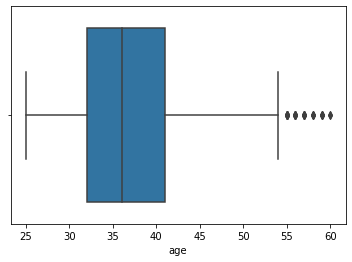

In [47]:
sns.boxplot(data['age'])

(array([206., 421., 852., 643., 586., 256., 185.,  60.,  42.,  18.]),
 array([25. , 28.5, 32. , 35.5, 39. , 42.5, 46. , 49.5, 53. , 56.5, 60. ]),
 <BarContainer object of 10 artists>)

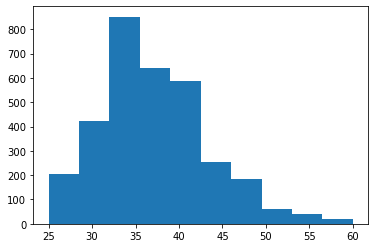

In [48]:
# Using a histogram to access the distribution of the data.

plt.hist(data['age'])

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

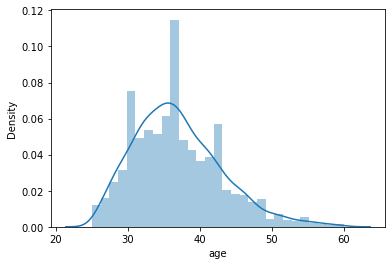

In [49]:
# Using a distplot to access the distribution of the data.

sns.distplot(data['age'])

In [50]:
# Skewness.

data['age'].skew()

0.6906467937322351

From the graphs above, the variable is slightly skewed to the right. Though it is almost a dumbbell shape, the skewness measure also showed that it is moderately skewed. Hence, it is good for use.

## CLEANING OTHER INDEPENDENT VARIABLES (FEATURES)

In [51]:
# 'bank_account_type'

data['bank_account_type'].value_counts()

Savings    2570
Other       653
Current      46
Name: bank_account_type, dtype: int64

In [52]:
# reference category will be Current

In [89]:
# Distribution of good and bad loans according to bank account type.
data['good_bad_flag'].groupby(data['bank_account_type']).value_counts()

bank_account_type  good_bad_flag
Current            1                  41
                   0                   5
Other              1                 565
                   0                  88
Savings            1                1950
                   0                 620
Name: good_bad_flag, dtype: int64

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bank_account_type', ylabel='count'>

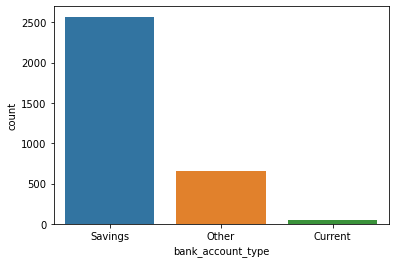

In [53]:
sns.countplot(data['bank_account_type'])

In [54]:
# 'employment_status_clients'

data['employment_status_clients'].value_counts()

Permanent        2340
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [55]:
data['employment_status_clients'].unique()

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

In [56]:
data['employment_status_clients'].isna().sum()

493

In [57]:
# Replacing nan with an editable string.
data['employment_status_clients'] = data['employment_status_clients'].replace(to_replace=np.nan, value='null', regex=True)

# Checking if the process worked.
data['employment_status_clients'].isna().sum()

0

No more na or nan in the column as it has been replace with a string ('null')

In [58]:
data['employment_status_clients'].unique()

array(['null', 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

In [59]:
data['employment_status_clients'].value_counts()

Permanent        2340
null              493
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [60]:
# Defining a function to restructure the column.
# Permanent will be replaced with Employed,
# Retired, Unemployed, and null will be replaced with Others cos they are few.
# Others could also cover for temporary employments and people who did not enter their job details.

def replace_nan(x):
    if x == 'Permanent':
        return 'Employed'
    elif x == 'Student':
        return 'Student'
    elif x == 'Self-Employed':
        return 'Self-Employed'
    elif x == 'Retired':
        return 'Others'
    elif x == 'Contract':
        return 'Self-Employed'
    elif x == 'Unemployed':
        return 'Others'
    elif x == 'null':
        return 'Others'
    

In [61]:
data['employment_status_clients'] = data['employment_status_clients'].map(replace_nan)

In [62]:
data['employment_status_clients'].unique()

array(['Others', 'Employed', 'Student', 'Self-Employed'], dtype=object)

In [64]:
data['employment_status_clients'].value_counts()

Employed         2340
Others            540
Self-Employed     278
Student           111
Name: employment_status_clients, dtype: int64

In [65]:
# reference category will be Others

In [88]:
# Distribution of good and bad loans according to employment status.
data['good_bad_flag'].groupby(data['employment_status_clients']).value_counts()

employment_status_clients  good_bad_flag
Employed                   1                1859
                           0                 481
Others                     1                 383
                           0                 157
Self-Employed              1                 233
                           0                  45
Student                    1                  81
                           0                  30
Name: good_bad_flag, dtype: int64

In [66]:
# 'level_of_education_clients'

data['level_of_education_clients'].value_counts()

Graduate         321
Secondary         65
Post-Graduate     50
Primary            7
Name: level_of_education_clients, dtype: int64

In [67]:
data['level_of_education_clients'].unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [68]:
data['level_of_education_clients'].isna().sum()

2826

In [69]:
data.shape

(3269, 12)

In [70]:
data.shape - data['level_of_education_clients'].isna().sum()

array([  443, -2814])

In [71]:
# Checking for the percentage of missing values in this column.
# (number of missing data / total number of rows) * 100

(data['level_of_education_clients'].isna().sum() / data.shape[0]) * 100

86.4484551850719

We may need to drop this column because 86.45% of the data is missing.

In [72]:
# 'loannumber'

data['loannumber'].dtype

dtype('int64')

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loannumber'>

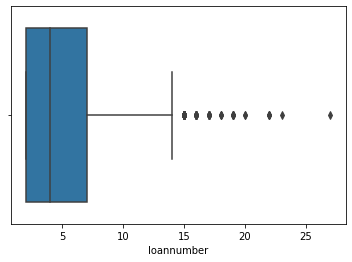

In [73]:
# Outliers do not really affect dual class systems cos they fall into one of two categories.
# But it is important to check for outliers in the target variables of regression problems.

sns.boxplot(data['loannumber'])

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loannumber', ylabel='Density'>

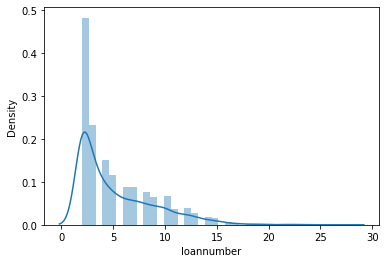

In [74]:
sns.distplot(data['loannumber'])

In [75]:
data['loannumber'].describe()

count    3269.000000
mean        5.189660
std         3.667166
min         2.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        27.000000
Name: loannumber, dtype: float64

In [76]:
data['loannumber'].skew()

1.3191106662821894

loannumber is highly skewed to the right since its skewness is greater than 1.0, it is also made visible through the distplot above. It can be corrected by log transformation (np.log) or normalization (standardscaler).

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loanamount'>

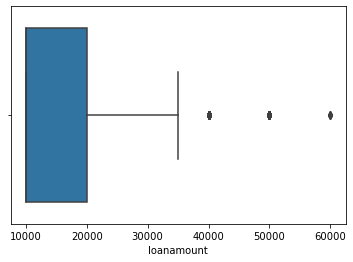

In [77]:
# 'loanamount'

sns.boxplot(data['loanamount'])

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loanamount', ylabel='Density'>

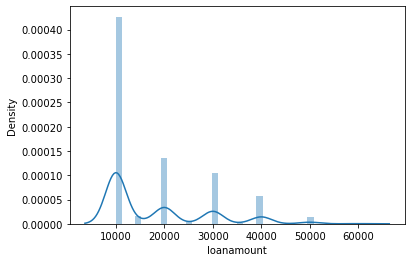

In [78]:
sns.distplot(data['loanamount'])

(array([1835.,   66.,  582.,   19.,  447.,    9.,  248.,    0.,   57.,
           6.]),
 array([10000., 15000., 20000., 25000., 30000., 35000., 40000., 45000.,
        50000., 55000., 60000.]),
 <BarContainer object of 10 artists>)

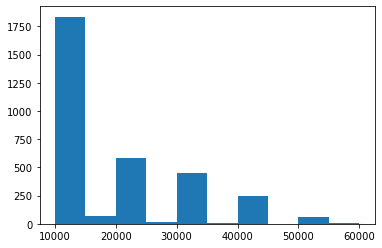

In [79]:
plt.hist(data['loanamount'])

In [80]:
data['loanamount'].skew()

1.2406233255734334

loanamount is highly positively skewed.

In [81]:
# 'termdays'
# This should be converted to string because it is categorical in nature.
# If it isn't, the machine may read 60days as having more weight than 30days and may rank them in terms of number.

data['termdays'].value_counts()

30    2344
15     685
60     219
90      21
Name: termdays, dtype: int64

In [82]:
data['termdays'].unique()

array([30, 15, 60, 90], dtype=int64)

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='termdays', ylabel='count'>

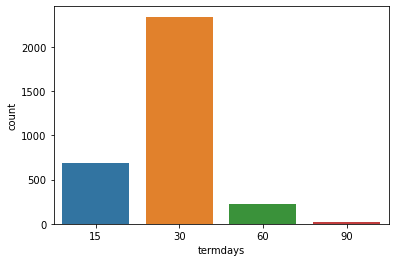

In [83]:
sns.countplot(data['termdays'])

In [84]:
# reference_category will be 90days.

In [85]:
# Converting 'termdays' to category.

data['termdays'] = data['termdays'].astype('str')

data['termdays'].dtypes

dtype('O')

In [86]:
# Distribution of good and bad loans according to loan term.
data['good_bad_flag'].groupby(data['termdays']).value_counts()

termdays  good_bad_flag
15        1                 526
          0                 159
30        1                1837
          0                 507
60        1                 175
          0                  44
90        1                  18
          0                   3
Name: good_bad_flag, dtype: int64

In [87]:
# Dropping unwanted columns
data = data.drop(['birthdate', 'level_of_education_clients', 'date', 'time', 'year'], axis=1)

data.shape

(3269, 7)

In [150]:
data.head()

,bank_account_type,employment_status_clients,loannumber,loanamount,termdays,good_bad_flag,age
0,Savings,Others,2,10000.0,30,1,48
1,Savings,Employed,2,10000.0,30,0,35
2,Savings,Others,4,10000.0,30,1,34
3,Savings,Employed,2,10000.0,15,1,30
4,Savings,Employed,6,20000.0,30,1,31


In [90]:
# Selecting only categorical features.
cat_variables = data.select_dtypes(include=['object'])

# Selecting only numeric features.
num_variables = data.select_dtypes(exclude=['object'])

## Dummify Categorical variables

In [91]:
cat_variables.head(3)

,bank_account_type,employment_status_clients,termdays
0,Savings,Others,30
1,Savings,Employed,30
2,Savings,Others,30


In [92]:
dummy_variables = pd.get_dummies(cat_variables)
dummy_variables.head()

,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,employment_status_clients_Employed,employment_status_clients_Others,employment_status_clients_Self-Employed,employment_status_clients_Student,termdays_15,termdays_30,termdays_60,termdays_90
0,0,0,1,0,1,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0
3,0,0,1,1,0,0,0,1,0,0,0
4,0,0,1,1,0,0,0,0,1,0,0


In [93]:
# Reference categories.
reference_categories = ['bank_account_type_Current', 'employment_status_clients_Others', 'termdays_90']

# Drop reference categories to avoid multicollinearity.
dummy_variables = dummy_variables.drop(reference_categories, axis=1)

In [94]:
num_variables.head(3)

,loannumber,loanamount,good_bad_flag,age
0,2,10000.0,1,48
1,2,10000.0,0,35
2,4,10000.0,1,34


In [95]:
# Correlation matrix.

corr_matrix = num_variables.corr()
corr_matrix

,loannumber,loanamount,good_bad_flag,age
loannumber,1.000000,0.834712,0.091969,-0.008560
loanamount,0.834712,1.000000,0.117787,0.012760
good_bad_flag,0.091969,0.117787,1.000000,0.059521
age,-0.008560,0.012760,0.059521,1.000000


In [96]:
corr_matrix['good_bad_flag'].sort_values(ascending=False)

good_bad_flag    1.000000
loanamount       0.117787
loannumber       0.091969
age              0.059521
Name: good_bad_flag, dtype: float64

In [97]:
# At this point, we can decide to log transform loannumber and loanamount or normalise them using StandardScaler.

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data['loannumber'] = scaler.fit_transform(data['loannumber'])
#data['loanamount'] = scaler.fit_transform(data['loanamount'])

# But, let's continue without transforming them now.

In [98]:
# Merging the dummy_variables and num_variables.
features = pd.concat([dummy_variables, num_variables], axis=1)
features.shape

(3269, 12)

In [99]:
features.head()

,bank_account_type_Other,bank_account_type_Savings,employment_status_clients_Employed,employment_status_clients_Self-Employed,employment_status_clients_Student,termdays_15,termdays_30,termdays_60,loannumber,loanamount,good_bad_flag,age
0,0,1,0,0,0,0,1,0,2,10000.0,1,48
1,0,1,1,0,0,0,1,0,2,10000.0,0,35
2,0,1,0,0,0,0,1,0,4,10000.0,1,34
3,0,1,1,0,0,1,0,0,2,10000.0,1,30
4,0,1,1,0,0,0,1,0,6,20000.0,1,31


In [100]:
corr_matrix = features.corr()
corr_matrix['good_bad_flag'].sort_values(ascending=False)

good_bad_flag                              1.000000
loanamount                                 0.117787
bank_account_type_Other                    0.100836
loannumber                                 0.091969
age                                        0.059521
employment_status_clients_Employed         0.048247
employment_status_clients_Self-Employed    0.041518
termdays_60                                0.011158
termdays_30                                0.006987
termdays_15                               -0.017464
employment_status_clients_Student         -0.023680
bank_account_type_Savings                 -0.107423
Name: good_bad_flag, dtype: float64

<AxesSubplot:>

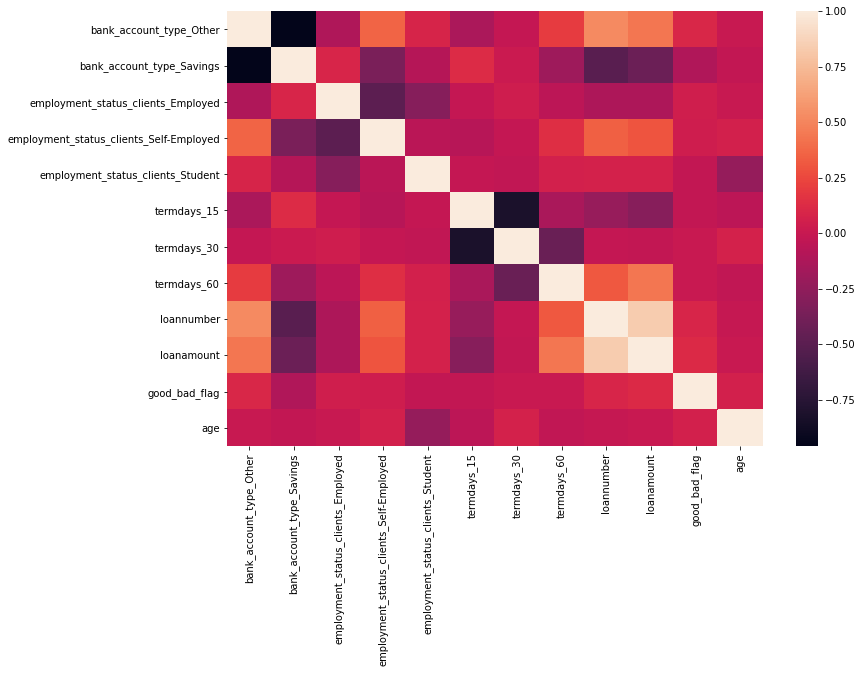

In [101]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix)

In [102]:
corr_matrix

,bank_account_type_Other,bank_account_type_Savings,employment_status_clients_Employed,employment_status_clients_Self-Employed,employment_status_clients_Student,termdays_15,termdays_30,termdays_60,loannumber,loanamount,good_bad_flag,age
bank_account_type_Other,1.000000,-0.958000,-0.116079,0.363346,0.087984,-0.131282,-0.013973,0.199697,0.521498,0.441438,0.100836,-0.001257
bank_account_type_Savings,-0.958000,1.000000,0.096532,-0.349202,-0.079363,0.123691,0.013599,-0.188522,-0.500862,-0.422444,-0.107423,-0.020696
employment_status_clients_Employed,-0.116079,0.096532,1.000000,-0.483854,-0.297547,-0.015554,0.042355,-0.050903,-0.122789,-0.117711,0.048247,0.002894
employment_status_clients_Self-Employed,0.363346,-0.349202,-0.483854,1.000000,-0.057157,-0.073436,-0.012993,0.137629,0.348226,0.298251,0.041518,0.060829
employment_status_clients_Student,0.087984,-0.079363,-0.297547,-0.057157,1.000000,-0.013527,-0.028465,0.064611,0.069534,0.068412,-0.023680,-0.228088
termdays_15,-0.131282,0.123691,-0.015554,-0.073436,-0.013527,1.000000,-0.819609,-0.137966,-0.218098,-0.292399,-0.017464,-0.051511
termdays_30,-0.013973,0.013599,0.042355,-0.012993,-0.028465,-0.819609,1.000000,-0.426560,-0.010106,-0.023744,0.006987,0.068732
termdays_60,0.199697,-0.188522,-0.050903,0.137629,0.064611,-0.137966,-0.426560,1.000000,0.318510,0.438410,0.011158,-0.030381
loannumber,0.521498,-0.500862,-0.122789,0.348226,0.069534,-0.218098,-0.010106,0.318510,1.000000,0.834712,0.091969,-0.008560
loanamount,0.441438,-0.422444,-0.117711,0.298251,0.068412,-0.292399,-0.023744,0.438410,0.834712,1.000000,0.117787,0.012760


## Splitting into Features and Target.

In [103]:
X = features.drop(['good_bad_flag'], axis=1)
Y = features['good_bad_flag']

In [104]:
X.shape, Y.shape

((3269, 11), (3269,))

In [105]:
# Number of good cases. 
len(features[features['good_bad_flag']==1])

2556

In [106]:
# Number of bad cases.
len(features[features['good_bad_flag']==0])

713

## Managing Data Imbalance.

## Oversampling

In [107]:
# We'll oversample the bad class because it is very low compared to the good class.
# We'll use SMOTE because it doesn't lead to overfitting.
from imblearn.over_sampling import SMOTE
from collections import Counter

In [108]:
# Number of good(1) and bad(0) before resampling.
counter = Counter(Y)
for k, v in counter.items():
    dist = v / len(Y)
    print(f"Class:{k}, n:{v}, ({round(dist, 2)}%)")

Class:1, n:2556, (0.78%)
Class:0, n:713, (0.22%)


78% of the dataset fall in the good(1) class while 22% fall in the bad(0) class. So, we'll need to correct this imbalance. Of the several techniques available, we will oversample the minority class (bad -0) using SMOTE.

In [109]:
#sm = SMOTE(random_state=2, sampling_strategy={0:3650})

sm = SMOTE(random_state=2)
X_res, Y_res = sm.fit_resample(X, Y) 

In [110]:
# Number of good(1) and bad(0) after resampling.

counter = Counter(Y_res)
for k, v in counter.items():
    dist = v / len(Y_res)
    print(f"Class:{k}, n:{v}, ({round(dist, 2)}%)")

Class:1, n:2556, (0.5%)
Class:0, n:2556, (0.5%)


The classes have become balanced with the data having 50% of each.

In [111]:
X_res.shape, Y_res.shape

((5112, 11), (5112,))

## Model Training.

In [112]:
# Splitting and cross-validation libraries.
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

# Evaluation metrics.
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, log_loss, roc_curve

In [113]:
# Importing training algorithms.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [114]:
# Creating a function to split the data into folds, train the model, predict, and evaluate.

def pred(model):
    # Create an instance of the StratifiedKFold
    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    avg1 = 0
    avg2 = 0
    # Splitting the training data into folds so that all aspects of the data is used for training and testing the model.
    for train_index, test_index in fold.split(X_res, Y_res):
        X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
        y_train, y_test = Y_res.iloc[train_index], Y_res.iloc[test_index]
        
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        f1 = f1_score(prediction, y_test)
        auc = roc_auc_score(prediction, y_test)
        gini = (2 * auc) - 1
        con_matrix = confusion_matrix(prediction, y_test)
        
        # Calculating averages.
        avg1 += auc
        avg2 += f1
        
        avg_auc = avg1/5 # number of folds according to the n_splits is 5.
        avg_f1 = avg2/5
        
        print('F1: ',round(f1, 2))
        print('AUC: ',round(auc, 2))
        print('')
        
    print('Avg f1: ',round(avg_f1, 2))
    print('Avg AUC: ',round(avg_auc, 2))
    print('Gini Coefficient: ',round(gini, 3))
    print('')
    print('risk_matrix: \n',con_matrix)
    

NB: LogisticRegression, DecisionTree, and NaiveBayes do not usually perform well with imbalanced data.

## LogisticRegression

In [115]:
logit = LogisticRegression(random_state=12)

In [116]:
pred(logit)

F1:  0.55
AUC:  0.6

F1:  0.52
AUC:  0.58

F1:  0.53
AUC:  0.59

F1:  0.51
AUC:  0.59

F1:  0.48
AUC:  0.56

Avg f1:  0.52
Avg AUC:  0.58
Gini Coefficient:  0.111

risk_matrix: 
 [[354 302]
 [157 209]]


## RandomForestClassifier

In [117]:
forest = RandomForestClassifier(random_state=12)

In [118]:
pred(forest)

F1:  0.74
AUC:  0.74

F1:  0.67
AUC:  0.71

F1:  0.69
AUC:  0.71

F1:  0.69
AUC:  0.72

F1:  0.67
AUC:  0.71

Avg f1:  0.69
Avg AUC:  0.72
Gini Coefficient:  0.421

risk_matrix: 
 [[406 198]
 [105 313]]


## KNearestNeighbors

In [119]:
# Splitting the data into training and evaluation sets.

xtrain, xtest, ytrain, ytest = train_test_split(X_res, Y_res, test_size=0.25, stratify=Y_res, random_state=12)

In [120]:
# training data.
xtrain.shape, ytrain.shape

((3834, 11), (3834,))

In [121]:
# test data.
xtest.shape, ytest.shape

((1278, 11), (1278,))

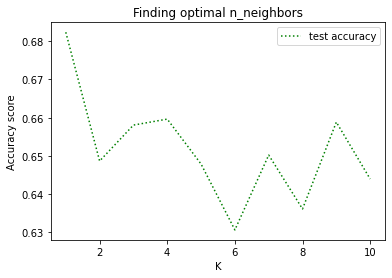

In [122]:
# Finding optimal n_neighbors.

n_rng = range(1,11)
test_accuracy = []

for n in n_rng:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(xtrain, ytrain)
    test_accuracy.append(knn.score(xtest, ytest))
    
plt.plot(n_rng, test_accuracy, label = 'test accuracy', c = 'g', linestyle = 'dotted')
plt.title('Finding optimal n_neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy score')
plt.legend()

According to the knn graph, the model has the highest accuracy at n=1. So, we will choose 1 as number of neighbors.

In [123]:
knn = KNeighborsClassifier(n_neighbors=1, p=2)

In [124]:
pred(knn)

F1:  0.68
AUC:  0.66

F1:  0.64
AUC:  0.64

F1:  0.66
AUC:  0.63

F1:  0.67
AUC:  0.68

F1:  0.64
AUC:  0.65

Avg f1:  0.66
Avg AUC:  0.65
Gini Coefficient:  0.3

risk_matrix: 
 [[342 189]
 [169 322]]


Conclusion: Better than LogisticRegression output but not as good as RandomForest output.

## Support Vector Classifier

In [125]:
svc = SVC(random_state=12)

In [126]:
pred(svc)

F1:  0.55
AUC:  0.59

F1:  0.53
AUC:  0.58

F1:  0.54
AUC:  0.59

F1:  0.53
AUC:  0.59

F1:  0.5
AUC:  0.56

Avg f1:  0.53
Avg AUC:  0.58
Gini Coefficient:  0.12

risk_matrix: 
 [[346 288]
 [165 223]]


## Gradient Boost

In [127]:
boost = GradientBoostingClassifier(random_state=12)

In [128]:
pred(boost)

F1:  0.69
AUC:  0.71

F1:  0.64
AUC:  0.68

F1:  0.67
AUC:  0.68

F1:  0.65
AUC:  0.67

F1:  0.64
AUC:  0.68

Avg f1:  0.66
Avg AUC:  0.69
Gini Coefficient:  0.357

risk_matrix: 
 [[392 216]
 [119 295]]


Conclusion: Since Random Forest performed better than all the trained models, we'd try to improve the Random Forest model.

Things to do:

1. Get feature ratings through feature importance.

2. Through the ratings, try to engineer new features.

3. Try feature selection through SelectKBest or Recursive Feature Elimination with Cross Validation (RFECV).

4. Use GridSearchCV to tune the hyperparameters.

## Proceeding with the Random Forest model.

In [129]:
# Checking feature importance.
feature_importance = forest.feature_importances_
feature_importance_table = pd.DataFrame(X_res.columns, columns=['Features'])
feature_importance_table['Importance'] = feature_importance

feature_importance_table.sort_values(by='Importance', ascending=False)

,Features,Importance
10,age,0.441743
8,loannumber,0.193981
9,loanamount,0.093368
0,bank_account_type_Other,0.052891
2,employment_status_clients_Employed,0.046930
1,bank_account_type_Savings,0.040142
6,termdays_30,0.039256
5,termdays_15,0.030574
3,employment_status_clients_Self-Employed,0.029119
7,termdays_60,0.016870


<AxesSubplot:title={'center':'Feature Importance'}>

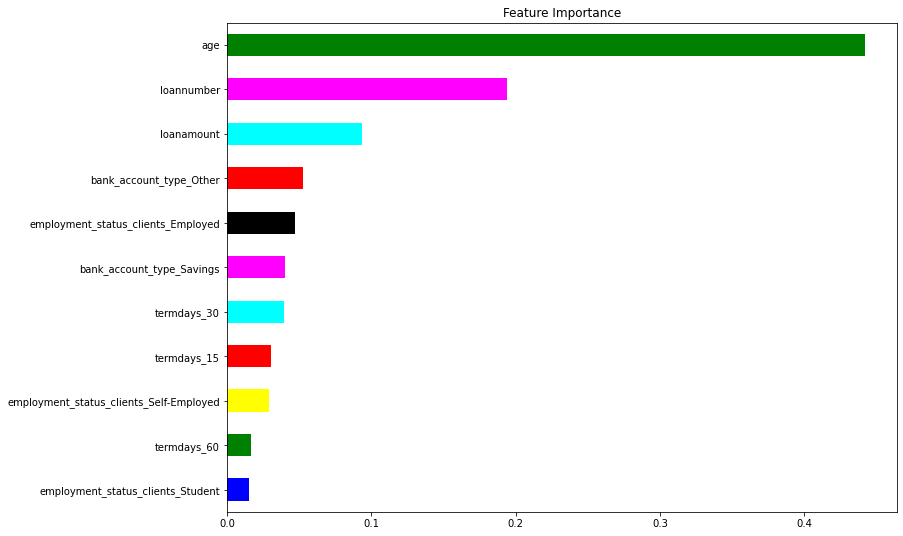

In [130]:
# Plotting the feature importance.

plt.figure(figsize=(12,9))
feat_imp = pd.Series(feature_importance, index=X_res.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', title='Feature Importance', 
              color=['blue', 'green', 'yellow', 'red', 'cyan', 'magenta', 'black', 
                     'red', 'cyan', 'magenta', 'green'])

## Bivariate analysis between pairs of numeric features to check for correlation and possible relationships.

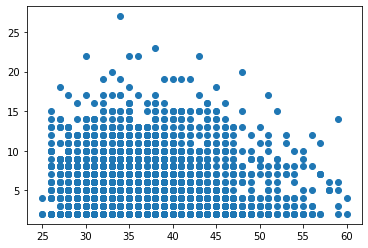

In [131]:
plt.scatter(x=features['age'], y=features['loannumber'])

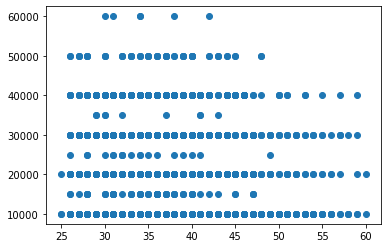

In [132]:
plt.scatter(x=features['age'], y=features['loanamount'])

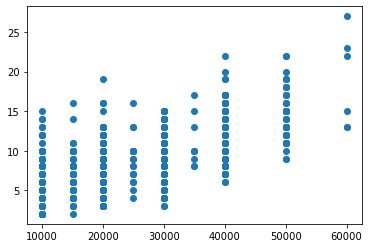

In [133]:
plt.scatter(x=features['loanamount'], y=features['loannumber'])

In [134]:
# No defined relationship between each pair.
# We can engineer new features by combining them and seeing how they affect the model.

In [135]:
# Creating new features from existing ones.

X['age_per_loannumber'] = X['age'] / X['loannumber']
X['amount_per_loannumber'] = X['loanamount'] / X['loannumber']

X['age_per_loanamount'] = X['age'] / X['loanamount']
X['employed_other'] = X['bank_account_type_Other'] * X['employment_status_clients_Employed']

X['age_employed'] = X['age'] * X['employment_status_clients_Employed']
X['age_other'] = X['age'] * X['bank_account_type_Other']

In [136]:
X.head(10)

,bank_account_type_Other,bank_account_type_Savings,employment_status_clients_Employed,employment_status_clients_Self-Employed,employment_status_clients_Student,termdays_15,termdays_30,termdays_60,loannumber,loanamount,age,age_per_loannumber,amount_per_loannumber,age_per_loanamount,employed_other,age_employed,age_other
0,0,1,0,0,0,0,1,0,2,10000.0,48,24.000000,5000.000000,0.00480,0,0,0
1,0,1,1,0,0,0,1,0,2,10000.0,35,17.500000,5000.000000,0.00350,0,35,0
2,0,1,0,0,0,0,1,0,4,10000.0,34,8.500000,2500.000000,0.00340,0,0,0
3,0,1,1,0,0,1,0,0,2,10000.0,30,15.000000,5000.000000,0.00300,0,30,0
4,0,1,1,0,0,0,1,0,6,20000.0,31,5.166667,3333.333333,0.00155,0,31,0
5,0,1,1,0,0,0,1,0,2,10000.0,29,14.500000,5000.000000,0.00290,0,29,0
6,0,1,0,0,0,0,1,0,2,10000.0,27,13.500000,5000.000000,0.00270,0,0,0
7,0,1,1,0,0,0,1,0,2,10000.0,51,25.500000,5000.000000,0.00510,0,51,0
8,1,0,0,0,1,0,1,0,7,30000.0,27,3.857143,4285.714286,0.00090,0,0,27
9,0,1,1,0,0,0,1,0,5,20000.0,35,7.000000,4000.000000,0.00175,0,35,0


## Preparing for another round of modeling.

In [137]:
X.shape, Y.shape

((3269, 17), (3269,))

<AxesSubplot:>

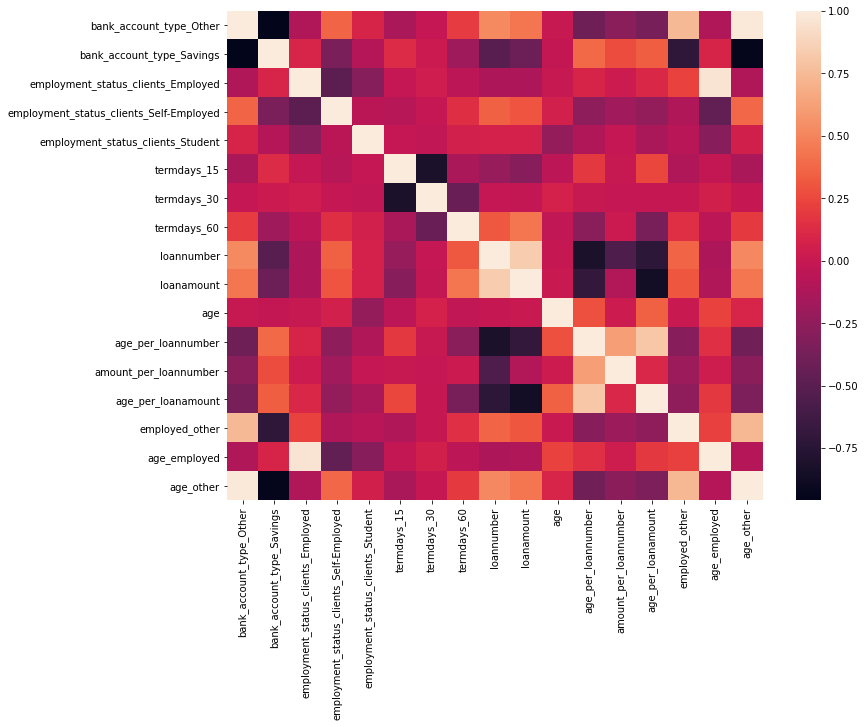

In [138]:
# Checking for correlation among features -multicolinearity.

corr_matrix = X.corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix)

A few features are highly correlated, but we can ignore them and see how our model performs.

In [139]:
# Oversampling

sm = SMOTE(random_state=2)
X_res, Y_res = sm.fit_resample(X, Y) 

In [140]:
X_res.shape, Y_res.shape

((5112, 17), (5112,))

In [141]:
# Number of good(1) and bad(0) after resampling.

counter = Counter(Y_res)
for k, v in counter.items():
    dist = v / len(Y_res)
    print(f"Class:{k}, n:{v}, ({round(dist, 2)}%)")

Class:1, n:2556, (0.5%)
Class:0, n:2556, (0.5%)


In [142]:
# Creating a function to split the data into folds, train the model, predict, and evaluate.

def pred(model):
    # Create an instance of the StratifiedKFold
    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    avg1 = 0
    avg2 = 0
    # Splitting the training data into folds so that all aspects of the data is used for training and testing the model.
    for train_index, test_index in fold.split(X_res, Y_res):
        X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
        y_train, y_test = Y_res.iloc[train_index], Y_res.iloc[test_index]
        
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        f1 = f1_score(prediction, y_test)
        auc = roc_auc_score(prediction, y_test)
        gini = (2 * auc) - 1
        con_matrix = confusion_matrix(prediction, y_test)
        
        # Calculating averages.
        avg1 += auc
        avg2 += f1
        
        avg_auc = avg1/5 # number of folds according to the n_splits is 5.
        avg_f1 = avg2/5
        
        print('F1: ',round(f1, 2))
        print('AUC: ',round(auc, 2))
        print('')
        
    print('Avg f1: ',round(avg_f1, 2))
    print('Avg AUC: ',round(avg_auc, 2))
    print('Gini Coefficient: ',round(gini, 3))
    print('')
    print('risk_matrix: \n',con_matrix)
    

In [143]:
forest1 = RandomForestClassifier(random_state=12)

In [144]:
pred(forest1)

F1:  0.75
AUC:  0.74

F1:  0.71
AUC:  0.72

F1:  0.73
AUC:  0.74

F1:  0.72
AUC:  0.73

F1:  0.72
AUC:  0.73

Avg f1:  0.72
Avg AUC:  0.73
Gini Coefficient:  0.459

risk_matrix: 
 [[391 158]
 [120 353]]


There is a slight improvement in the model. Avg F1 score increased by 0.03 while Avg AUC increased by 0.01. The Gini Coefficient and risk matrix also improved. This implies that the new features created were helpful.

<AxesSubplot:title={'center':'Feature Importance'}>

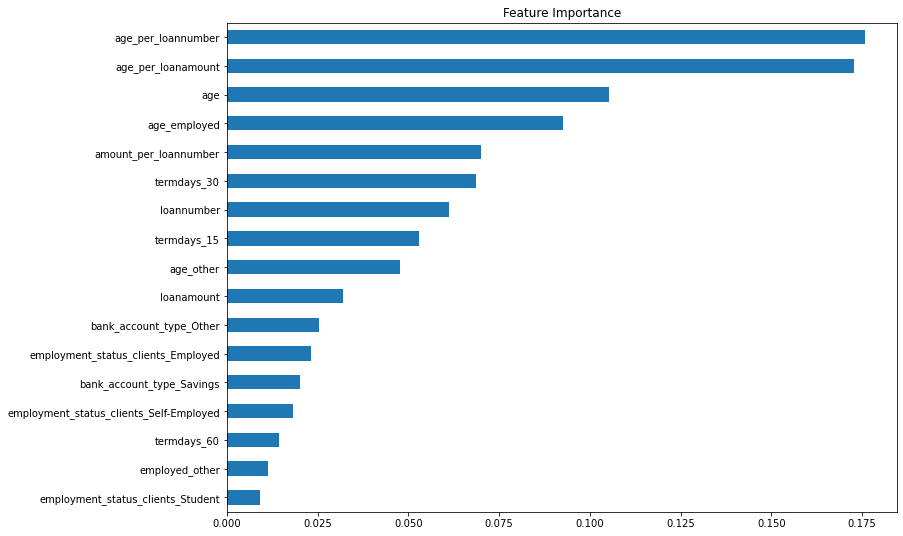

In [146]:
# Plotting Feature Importance.

plt.figure(figsize=(12,9))
feat_imp = pd.Series(forest1.feature_importances_, index=X_res.columns)
feat_imp.sort_values().plot(kind='barh', title='Feature Importance')

In [147]:
# Saving the model.
pickle.dump(forest1, open('PD.pkl', 'wb'))

## Feature Selection

In [148]:
# Importing feature selection libraries.
from sklearn.feature_selection import SelectKBest, RFECV

In [149]:
# Creating a function to split the data into folds, select features, train the model, predict, and evaluate.

def pred(model):
    # Create an instance of the StratifiedKFold
    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    avg1 = 0
    avg2 = 0
    # Splitting the training data into folds so that all aspects of the data is used for training and testing the model.
    for train_index, test_index in fold.split(X_res, Y_res):
        X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
        y_train, y_test = Y_res.iloc[train_index], Y_res.iloc[test_index]
        
        # RFECV
        rf = RFECV(model, cv=5, step=1, scoring='roc_auc')
        rec = rf.fit(X_train, y_train)
        
        # Get selected features.
        rec_indices = rec.get_support(indices=True)
        selected_features = [X_res.columns[i] for i in rec_indices]
        
        # Transforming training and testing features into selected features.
        X_train_rec = rec.transform(X_train)
        X_test_rec = rec.transform(X_test)
        
        # Fitting the model.
        model.fit(X_train_rec, y_train)
        
        # Making prediction
        prediction = model.predict(X_test_rec)
        pred_proba = model.predict_proba(X_test_rec)[:,0] # 0 cos we want to know the probability of default -likelihood of being a bad loan.
        
        # Evaluating the model's performance.
        f1 = f1_score(prediction, y_test)
        auc = roc_auc_score(prediction, y_test)
        gini = (2 * auc) - 1
        con_matrix = confusion_matrix(prediction, y_test)
        
        # Calculating averages.
        avg1 += auc
        avg2 += f1
        
        avg_auc = avg1/5 # number of folds according to the n_splits is 5.
        avg_f1 = avg2/5
        
        print('F1: ',round(f1, 2))
        print('AUC: ',round(auc, 2))
        print('')
        
    print('Avg f1: ',round(avg_f1, 2))
    print('Avg AUC: ',round(avg_auc, 2))
    print('Gini Coefficient: ',round(gini, 3))
    print('')
    print('risk_matrix: \n',con_matrix)
    print('')
    print('')
    print(f'Number of features: {rec.n_features_}')
    print(f'Selected features: \n{selected_features}')
    

In [150]:
# Instantiating another RandomForestClassifier to train on selected features.
forest2 = RandomForestClassifier(random_state=12)

In [151]:
# Training and predicting with the selected features.

pred(forest2)

F1:  0.75
AUC:  0.74

F1:  0.71
AUC:  0.72

F1:  0.73
AUC:  0.74

F1:  0.72
AUC:  0.73

F1:  0.72
AUC:  0.73

Avg f1:  0.72
Avg AUC:  0.73
Gini Coefficient:  0.459

risk_matrix: 
 [[391 158]
 [120 353]]


Number of features: 17
Selected features: 
['bank_account_type_Other', 'bank_account_type_Savings', 'employment_status_clients_Employed', 'employment_status_clients_Self-Employed', 'employment_status_clients_Student', 'termdays_15', 'termdays_30', 'termdays_60', 'loannumber', 'loanamount', 'age', 'age_per_loannumber', 'amount_per_loannumber', 'age_per_loanamount', 'employed_other', 'age_employed', 'age_other']


We can decide to collect these 16 features or the original 17 features when deploying the model. If collecting the above 16 features, then we'll use forest2 model else, we'd use forest1.

In [152]:
pickle.dump(forest2, open('PD_Model2.pkl', 'wb'))

In [ ]:
#!pip install imblearn

In [ ]:
#!pip install catboost

The data for this model was gotten from a DSN Loan challenge on Zindi